# Test 6.0


## Theory Question


Question 1: What is Transfer Learning and why is it important?

Question 2: Define Auxiliary Branches, Naive Inception Module, and Dimension Reduction with mathematics.

Question 3: Define Reduction Block and specify which architecture it uses.







In [ ]:
'''1. While building the models our architecture increses wider and deeper so that we get overfitting and network degradation problems.
And another problem is Limitation of computational resources and most of time is also conusuming.
So to overcome this problem we use Transfer Learning. In this we use pre-trained models.'''

'''2. Auxiliary Branches are used in dimension reduction inception architecture these are used to calculate the loss of the model we have 2
auxiliary branches in dimension reduction inception architecture
In naive inception we have 9 modules and 27 layers including max pooling layers and in this model we different sizes of kernel filters to capture the all information
which is samll and big images too and we use 3x3, 5x5 kernels directly
And in Dimension Reduction we use 3x3, 5x5 kernels but before this we use 1x1 kernel to reduce the dimensions and in this we use
auxiliary branches too through this brannches we calculate loss using average of softmax layers.
In this we use SGD with momentum 0.9 and after 8 epochs we reduce the momentum by 40%
And in this we sparse convolution which means Deeper and wider architecture
And in this model we use CIFAR Dataset.'''

'''3. These Reduction Blocks we use in Inception ResNet Architecture. And these are used to reduce the kernel fiiter sizes fro 14x14 to 7x7
And The Reduction Blocks are used to gradually decrease the spatial dimensions of the feature maps
as the network goes deeper, while increasing the number of feature channels'''

## Practicle Question

- Load the chess dataset
    

# Step by Step instruction

#### Step 1: Load and Prepare the Dataset using ImageDataGenerator

    Task:
        - Load the Chessman Image Dataset from the specified directory using ImageDataGenerator. Specify the path to the dataset directory.
        - Create instances of ImageDataGenerator for training and validation, including data augmentation techniques.

        -  Generate batches of augmented image data for training and validation
            train_generator = train_datagen.flow_from_directory(
                train_data_dir,
                target_size=(224, 224),  # Adjust according to your model's input shape
                batch_size=32,
                class_mode='categorical',
                subset='Traning'
                )

            validation_generator = valid_datagen.flow_from_directory(
                valid_data_dir,
                target_size=(224, 224),  # Adjust according to your model's input shape
                batch_size=32,
                class_mode='categorical',
                subset='Validation'
                )
        
#### Step 2: Define the Alexnet Architecture

    Task:
        - Construct a basic Alexnet architecture for image classification.Start with an input layer suitable for your dataset dimensions.(use 32  kernel filters with 3 X 3 X 3 kernal filters only on each layer )
        - Stack convolutional layers (Conv2D) followed by pooling layers (MaxPooling2D).
        - Add fully connected layers (Dense) at the end with appropriate activation functions.

#### Step 3: Compile the Model

    Task:
        - Compile the ALexnet model for training.
        - Choose an appropriate optimizer (e.g., Adam).
        - Specify a loss function (e.g., categorical crossentropy) suitable for multi-class classification.
        - Add metrics to monitor during training (e.g., accuracy).

#### Step 4: Train the Model

    Task:
        - Train the Alexnet model using the training data prepared with ImageDataGenerator.
        - Fit the model using model.fit method, passing the training generator.
        - Specify number of epochs and batch size based on computational resources and dataset size.

#### Step 5: Evaluate the Model

    Task:
        - Evaluate the trained model on the validation data.
        - Use model.evaluate to calculate the model's performance metrics on unseen data.
        - Analyze metrics such as accuracy to assess model performance.

#### Step 6: Plot Training and Testing Loss
#### Step 7: Save the model in .h5 extension
#### Step 8: Load the model
#### Step 9: Test the model
    

In [ ]:
#AI/ML Trainer - Saurav
#Date 14 June 2024
#Time - 12:20

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Loaded images shape: (1000, 150, 150, 3)
Loaded labels shape: /n Images with Folder name (1000,) /n Images with Folder name


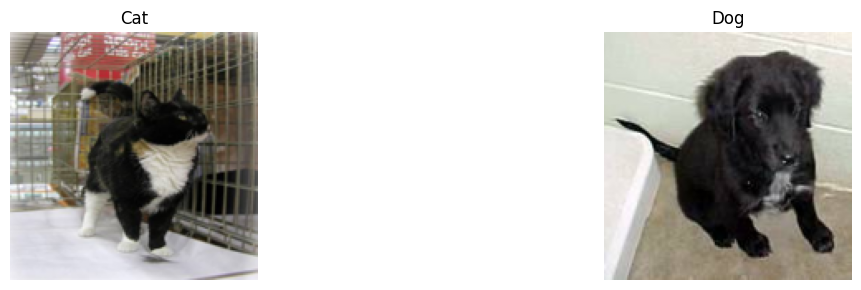

In [ ]:
# Code for loading the dataset and plotting, with folder name
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Set up the directory path where your dataset is located
dataset_directory = '/content/drive/MyDrive/cats and Dog'

# Function to load the dataset
def load_dataset(directory):
    images = []
    labels = []
    class_names = sorted(os.listdir(directory))  # Assumes each subdirectory is a class

    for i, class_name in enumerate(class_names):
        class_directory = os.path.join(directory, class_name)
        for filename in os.listdir(class_directory):
            if filename.endswith('.jpg') or filename.endswith('.png'):
                image_path = os.path.join(class_directory, filename)
                image = Image.open(image_path)
                image = image.resize((150, 150))  # Resize if necessary
                image = np.array(image) / 255.0  # Normalize pixel values to [0, 1]
                images.append(image)
                labels.append(i)  # Store index of the class

    images = np.array(images)
    labels = np.array(labels)

    return images, labels, class_names

# Usage example
images, labels, class_names = load_dataset(dataset_directory)

# Print shape of loaded data for verification
print("Loaded images shape:", images.shape)
print("Loaded labels shape: /n Images with Folder name", labels.shape, "/n Images with Folder name")

# Plotting example: Plot one example image from each class
num_classes = len(class_names)
fig, axes = plt.subplots(1, num_classes, figsize=(15, 3))

for i, class_name in enumerate(class_names):
    class_indices = np.where(labels == i)[0]
    example_image = images[class_indices[0]]
    axes[i].imshow(example_image)
    axes[i].set_title(class_name)
    axes[i].axis('off')

plt.tight_layout()
plt.show()


In [15]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.models import load_model
import tensorflow as tf
import numpy as np



train_validation_dir = '/content/drive/MyDrive/cats and Dog'

IMAGE_SIZE=224
BATCH_SIZE=128

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
)

validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)

train_generator = train_datagen.flow_from_directory(
    train_validation_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='training'
)

validation_generator = validation_datagen.flow_from_directory(
    train_validation_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,

)

Found 901 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [27]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 52, 52, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 26, 26, 32)       

In [29]:
model.compile(optimizer=Adam(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
history = model.fit(train_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=10,
                    validation_data=validation_generator,
                    validation_steps=len(validation_generator)
                   )

Epoch 1/10
8/8 [==============================] - 153s 14s/step - loss: 0.6894 - accuracy: 0.5472 - val_loss: 0.6873 - val_accuracy: 0.5450
Epoch 2/10
8/8 [==============================] - 112s 14s/step - loss: 0.6856 - accuracy: 0.5438 - val_loss: 0.6828 - val_accuracy: 0.5450
Epoch 3/10
8/8 [==============================] - 109s 13s/step - loss: 0.6855 - accuracy: 0.5450 - val_loss: 0.6880 - val_accuracy: 0.5440
Epoch 4/10
8/8 [==============================] - 110s 14s/step - loss: 0.6922 - accuracy: 0.5405 - val_loss: 0.6920 - val_accuracy: 0.5910
Epoch 5/10
8/8 [==============================] - 122s 15s/step - loss: 0.6897 - accuracy: 0.5383 - val_loss: 0.6882 - val_accuracy: 0.5450
Epoch 6/10
8/8 [==============================] - 137s 19s/step - loss: 0.6921 - accuracy: 0.5172 - val_loss: 0.6928 - val_accuracy: 0.4980
Epoch 7/10
8/8 [==============================] - 111s 13s/step - loss: 0.6930 - accuracy: 0.5083 - val_loss: 0.6916 - val_accuracy: 0.5450
Epoch 8/10
8/8 [====

In [31]:
loss, accuracy = model.evaluate(validation_generator)
print('Validation loss:', loss)
print('Validation accuracy:', accuracy)

8/8 [==============================] - 31s 4s/step - loss: 0.6758 - accuracy: 0.5450
Validation loss: 0.6758344173431396
Validation accuracy: 0.5450000166893005


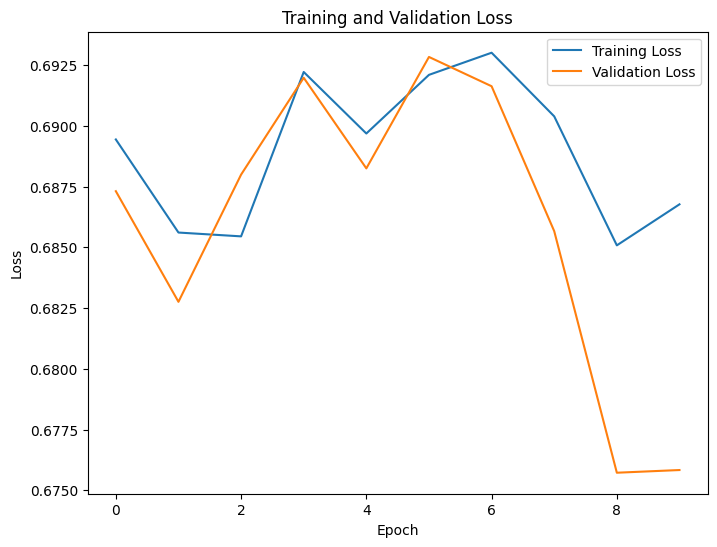

In [32]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [33]:
model.save('alexnet_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [34]:
loaded_model = load_model('alexnet_model.h5')

In [39]:
new_image = images[0]
new_image = np.uint8(new_image)
new_image = Image.fromarray(new_image).resize((224, 224))
new_image = np.array(new_image)
new_image = np.expand_dims(new_image, axis=0)

prediction = loaded_model.predict(new_image)
predicted_class = class_names[np.argmax(prediction)]

print("Predicted class:", predicted_class)

1/1 [==============================] - 1s 519ms/step
Predicted class: Dog
